In [77]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from osgeo import gdal

In [78]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data

### Loading data

In [99]:
# load data
x = rasterio.open('../Gao_code/raster/dTRI.tif') # cause
xMatrix = x.read(1)
xMatrix = xMatrix.T
y = rasterio.open('../Gao_code/raster/Cu.tif') # effect
yMatrix = y.read(1)
yMatrix = yMatrix.T
w = rasterio.open('../Gao_code/raster/Mg.tif') # effect
wMatrix = w.read(1)
wMatrix = wMatrix.T
z = rasterio.open('../Gao_code/raster/nlights03.tif') # cause
zMatrix = z.read(1)
zMatrix = zMatrix.T
zMatrix = zMatrix.astype(float)

### Original data

In [100]:
xMatrix.shape, yMatrix.shape, wMatrix.shape, zMatrix.shape

((125, 131), (126, 132), (126, 132), (125, 131))

In [14]:
y.bounds, y.transform, y.width

(BoundingBox(left=357500.0, bottom=1552500.0, right=987500.0, top=2212500.0),
 Affine(5000.0, 0.0, 357500.0,
        0.0, -5000.0, 2212500.0),
 126)

In [16]:
x.bounds, x.transform, x.width

(BoundingBox(left=360000.0, bottom=1555000.0, right=985000.0, top=2210000.0),
 Affine(5000.0, 0.0, 360000.0,
        0.0, -5000.0, 2210000.0),
 125)

In [68]:
z.bounds, z.transform, z.width

(BoundingBox(left=360000.0, bottom=1555000.0, right=985000.0, top=2210000.0),
 Affine(5000.0, 0.0, 360000.0,
        0.0, -5000.0, 2210000.0),
 125)

## Coregister data

In [86]:
import rasterio
from rasterio.windows import from_bounds
from osgeo import gdal
import numpy as np

# Paths to the input TIFF files
ind = '../Gao_code/raster/dTRI.tif'
nlights = '../Gao_code/raster/nlights03.tif'
cu = '../Gao_code/raster/Cu.tif'
mg = '../Gao_code/raster/Mg.tif'

output_ind = 'data/dTRI_aligned.tif'
output_nlights = 'data/nlights_aligned.tif'
output_cu = 'data/Cu_aligned.tif'
output_mg = 'data/Mg_aligned.tif'

In [82]:
# Function to calculate intersection of two bounding boxes
def get_intersection(bounds1, bounds2):
    minx = max(bounds1.left, bounds2.left)
    maxx = min(bounds1.right, bounds2.right)
    miny = max(bounds1.bottom, bounds2.bottom)
    maxy = min(bounds1.top, bounds2.top)
    if minx < maxx and miny < maxy:
        return (minx, miny, maxx, maxy)
    else:
        raise ValueError("No overlapping area found between the input TIFF files.")

# Function to reproject and resample to the overlapping area
def warp_to_overlap(input_tiff, output_tiff, bounds, crs, width, height):
    warp_options = gdal.WarpOptions(
        format='GTiff',
        outputBounds=bounds,
        dstSRS=crs.to_string(),
        width=width,
        height=height,
        resampleAlg='bilinear'
    )
    gdal.Warp(output_tiff, input_tiff, options=warp_options)

In [116]:
def get_bounds(tif1, tif2):
    # Read the TIFF files and get their bounding boxes
    with rasterio.open(tiff1) as src1:
        bounds1 = src1.bounds
        crs1 = src1.crs
    
    with rasterio.open(tiff2) as src2:
        bounds2 = src2.bounds
        crs2 = src2.crs
    
    # Find the intersection of the bounding boxes
    intersection_bounds = get_intersection(bounds1, bounds2)
    
    # Define the resolution and size based on the intersection area
    resolution = 5000  # Define your desired resolution (in units of the CRS)
    width = int((intersection_bounds[2] - intersection_bounds[0]) / resolution)
    height = int((intersection_bounds[3] - intersection_bounds[1]) / resolution)

    return intersection_bounds, width, height

In [118]:
def align(tiff, output, intersection_bounds, width, height):
    with rasterio.open(tiff) as src:
        bounds1 = src.bounds
        crs = src.crs
    warp_to_overlap(tiff, output, intersection_bounds, crs, width, height)
    print('Output TIFFs saved as: ' + output)

In [119]:
intersection_bounds, width, height = get_bounds(ind, cu)

# Warp both TIFF files to the overlapping area
align(ind, output_ind, intersection_bounds, width, height)
align(cu, output_cu, intersection_bounds, width, height)
align(nlights, output_nlights, intersection_bounds, width, height)
align(mg, output_mg, intersection_bounds, width, height)   

Output TIFFs saved as: data/dTRI_aligned.tif
Output TIFFs saved as: data/Cu_aligned.tif
Output TIFFs saved as: data/nlights_aligned.tif
Output TIFFs saved as: data/Mg_aligned.tif


## Comparison

In [120]:
# load data
x_al = rasterio.open('data/dTRI_aligned.tif') # cause
y_al = rasterio.open('data/Cu_aligned.tif') # effect
w_al = rasterio.open('data/Mg_aligned.tif') # effect
z_al = rasterio.open('data/nlights_aligned.tif') # cause

In [121]:
x_al.bounds, x_al.transform, x_al.width, x_al.height

(BoundingBox(left=360000.0, bottom=1555000.0, right=985000.0, top=2210000.0),
 Affine(5000.0, 0.0, 360000.0,
        0.0, -5000.0, 2210000.0),
 125,
 131)

In [122]:
y_al.bounds, y_al.transform, y_al.width, y_al.height

(BoundingBox(left=360000.0, bottom=1555000.0, right=985000.0, top=2210000.0),
 Affine(5000.0, 0.0, 360000.0,
        0.0, -5000.0, 2210000.0),
 125,
 131)

In [123]:
w_al.bounds, w_al.transform, w_al.width, w_al.height

(BoundingBox(left=360000.0, bottom=1555000.0, right=985000.0, top=2210000.0),
 Affine(5000.0, 0.0, 360000.0,
        0.0, -5000.0, 2210000.0),
 125,
 131)

In [124]:
z_al.bounds, z_al.transform, z_al.width, z_al.height

(BoundingBox(left=360000.0, bottom=1555000.0, right=985000.0, top=2210000.0),
 Affine(5000.0, 0.0, 360000.0,
        0.0, -5000.0, 2210000.0),
 125,
 131)

In [125]:
xMatrix_al = x_al.read(1)
xMatrix_al = xMatrix_al.T

yMatrix_al = y_al.read(1)
yMatrix_al = yMatrix_al.T

wMatrix_al = w_al.read(1)
wMatrix_al = wMatrix_al.T

zMatrix_al = z_al.read(1)
zMatrix_al = zMatrix_al.T

Text(0.5, 1.0, 'coregistered')

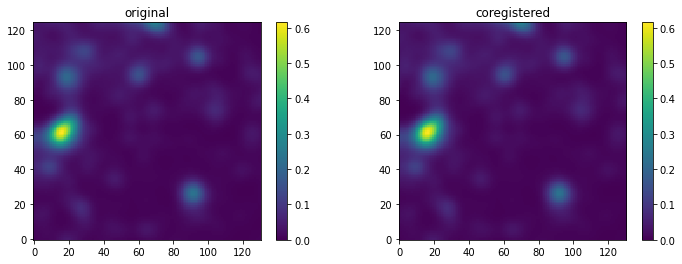

In [126]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
p0 = ax[0].imshow(xMatrix, origin='lower', interpolation='none')
p1 = ax[1].imshow(xMatrix_al, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0])
cbar1 = fig.colorbar(p1, ax=ax[1])

ax[0].set_title('original')
ax[1].set_title('coregistered')

Text(0.5, 1.0, 'coregistered')

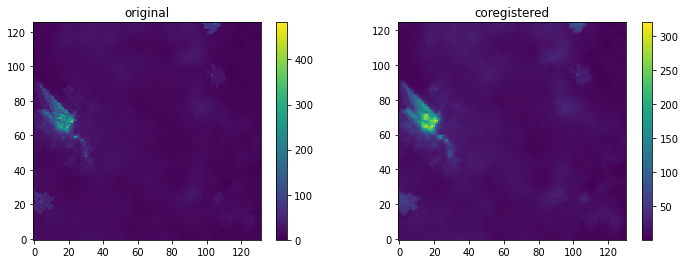

In [127]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
p0 = ax[0].imshow(yMatrix, origin='lower', interpolation='none')
p1 = ax[1].imshow(yMatrix_al, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0])
cbar1 = fig.colorbar(p1, ax=ax[1])

ax[0].set_title('original')
ax[1].set_title('coregistered')

Text(0.5, 1.0, 'coregistered')

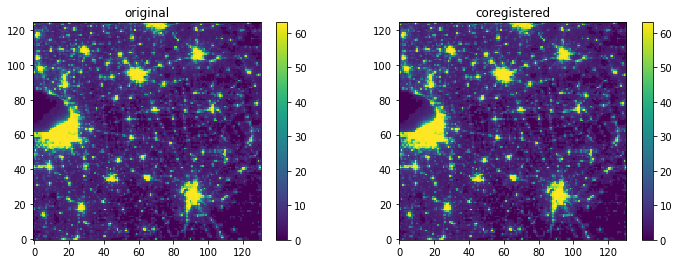

In [128]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
p0 = ax[0].imshow(zMatrix, origin='lower', interpolation='none')
p1 = ax[1].imshow(zMatrix_al, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0])
cbar1 = fig.colorbar(p1, ax=ax[1])

ax[0].set_title('original')
ax[1].set_title('coregistered')

Text(0.5, 1.0, 'coregistered')

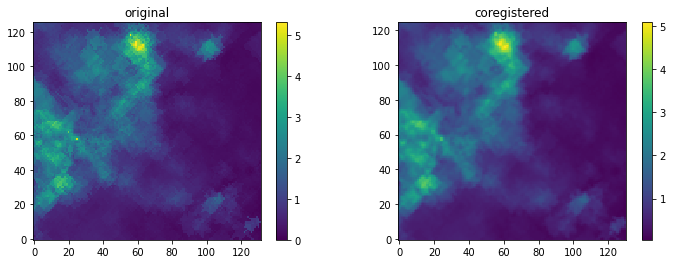

In [129]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
p0 = ax[0].imshow(wMatrix, origin='lower', interpolation='none')
p1 = ax[1].imshow(wMatrix_al, origin='lower', interpolation='none')

# Add colorbars next to each image
cbar0 = fig.colorbar(p0, ax=ax[0])
cbar1 = fig.colorbar(p1, ax=ax[1])

ax[0].set_title('original')
ax[1].set_title('coregistered')